### The code below flashes the lights at desired frequency when input is entered in
### And plots the data from the sensor

Enter the frequency (in Hz) at which the LED should flash:  10


The LED is flashing at 10.0 Hz.
Type 'stop' to turn it off.
1
2
3
4Collecting data from the IR sensor... Type 'stop' to end.

5
6
7
8
9
10


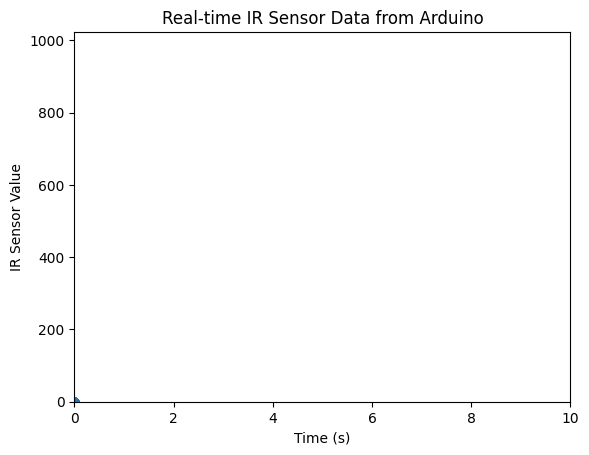

Type 'stop' to turn off the LED and stop the program:  stop


Stopping the LED and terminating the program.


In [6]:
import serial
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
import threading
import pylab as pl
from IPython import display

# Initialize communication with the Arduino
arduino = serial.Serial(port='/dev/cu.usbmodem101', baudrate=9600, timeout=1)
time.sleep(2)  # Wait for Arduino to initialize

# Initialize data structures for real-time plotting
window_size = 100  # Number of data points to display
data = deque([0] * window_size, maxlen=window_size)  # Circular buffer for data points
timestamps = deque([0] * window_size, maxlen=window_size)
start_time = time.time()

# Setup the plot

fig, ax = plt.subplots()
line, = ax.plot(timestamps, data, '-o')
ax.set_xlabel('Time (s)')
ax.set_ylabel('IR Sensor Value')
ax.set_title('Real-time IR Sensor Data from Arduino')
ax.set_xlim(0, 10)  # Initial x-axis limits (adjust as needed)
ax.set_ylim(0, 1023)  # Initial y-axis limits for typical IR sensor range

# Global control variables
running = True
led_on = False

def flash_led_at_frequency(frequency_hz):
    """Flashes the LED at the specified frequency in a separate thread."""
    global running, led_on
    
    period = 1 / frequency_hz  # Total period for one cycle (on + off)
    half_period = period / 2   # Half period for each state (on or off)

    print(f"The LED is flashing at {frequency_hz} Hz.\nType 'stop' to turn it off.")

    try:
        while running:
            start_cycle_time = time.perf_counter()  # Start time for this cycle

            # Turn LED ON
            
            arduino.write("HIGH\n".encode())
            led_on = True
            on_start = time.perf_counter()
            while time.perf_counter() - on_start < half_period:
                time.sleep(0.001)  # Small delay to yield control, ensuring timing accuracy

            # Turn LED OFF
            arduino.write("LOW\n".encode())
            led_on = False
            off_start = time.perf_counter()
            while time.perf_counter() - off_start < half_period:
                time.sleep(0.001)  # Small delay to yield control, ensuring timing accuracy

            # Adjust for any drift caused by code execution time
            elapsed_cycle_time = time.perf_counter() - start_cycle_time
            if elapsed_cycle_time < period:
                time.sleep(period - elapsed_cycle_time)  # Compensate to maintain frequency
    except KeyboardInterrupt:
        running = False
    finally:
        arduino.write("LOW\n".encode())  # Ensure LED is off before exiting
        arduino.close()

def update_plot():
    """Continuously reads data from the Arduino and updates the plot every second."""
    global running
    plt.ion()
    loop = 1
    update_interval = 1  # Plot update interval in seconds
    last_update_time = time.time()


    # Read data from the Arduino
    while running:
        print(loop)
        loop = loop + 1
        #print(arduino.in_waiting)
        if (loop >10): break  # just to control loop while debugging
        while arduino.in_waiting > 0:
            try:
                ir_value = arduino.readline().decode().strip()
                #print(ir_value)
                # Ensure it's a numeric value before adding to data
                if ir_value.isdigit():
                #if ('HIGH' in ir_value or 'LOW' in ir_value):
                    ir_value = int(ir_value)
                    #ir_value = 30 if ('HIGH' in ir_value) else -30 if ('LOW' in ir_value) else 0
                    print(f"Received IR Signal Value: {ir_value}")  # Print the signal value

                    current_time = time.time() - start_time
                    data.append(ir_value)
                    timestamps.append(current_time)

               

                    # Update the plot every second
                    #if time.time() - last_update_time >= update_interval:
                    if True:
                        #line.set_xdata(timestamps)
                        #line.set_ydata(data)
                        
                        # Automatically adjust x and y limits
                        #ax.set_xlim(min(timestamps), max(timestamps) + 1)  # Ensure x-axis extends with time
                        
                        pl.plot(timestamps, data)
                        pl.xlim(0, current_time + 1)
                        pl.ylim(min(data) - 10, max(data) + 10)
                        # Add axis labels and title
                        pl.xlabel('Time (s)')
                        pl.ylabel('Volts?')
                        pl.title('Volts? vs Time')
                        ###### uncomment for plotting
                        #display.clear_output(wait=True)
                        #display.display(pl.gcf())
                        
                        
                        ax.set_xlim(max(0, current_time - 10), current_time + 1)
                        ax.set_ylim(min(data) - 10, max(data) + 10)  # Add some padding to y-axis
                        ax.clear()
                        #ax.line(timestamps, data)
                        #ax.relim()
                        #ax.autoscale_view()
                        #plt.draw()
                        #plt.pause(0.01)  # Small pause for updates
                        fig.canvas.draw()
                        fig.canvas.flush_events()
                        #plt.show()
                        #last_update_time = time.time()
            except Exception as e:
                #continue
                print("Error reading data")
                
            except KeyboardInterrupt:
                print("Stopping data collection.")
    #finally:
    plt.ioff()  # Disable interactive mode
    plt.show()

def listen_for_stop_command():
    """Handles user input to stop the LED and terminate the program."""
    global running
    while running:
        user_input = input("Type 'stop' to turn off the LED and stop the program: ").strip().lower()
        if user_input == 'stop':
            running = False
            arduino.write("LOW\n".encode())  # Turn off the LED
            print("Stopping the LED and terminating the program.")
            break

# Start the LED flashing and input listener in separate threads
led_frequency = float(input("Enter the frequency (in Hz) at which the LED should flash: "))
led_thread = threading.Thread(target=flash_led_at_frequency, args=(led_frequency,))
led_thread.daemon = True
led_thread.start()

input_thread = threading.Thread(target=listen_for_stop_command)
input_thread.daemon = True
input_thread.start()

plot_thread = threading.Thread(target=update_plot)
plot_thread.daemon = True
plot_thread.start()

# Continuously update the plot
print("Collecting data from the IR sensor... Type 'stop' to end.")
#update_plot()


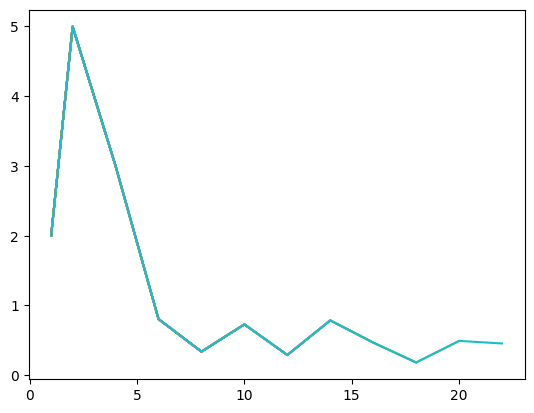

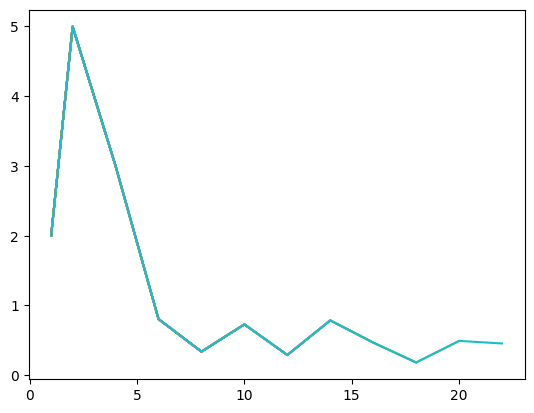

In [3]:
import time
import random
import pylab as pl

x= [1,2,3,4]
y=[2,5,4,3]

from IPython import display
for i in range(10):
    pl.plot(x,y)
    y.append(random.random())
    x.append(x[-1]+2)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1.0)

In [4]:
print(data)

deque([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 137, 59, 84, 47, 71, 46, 66, 43, 64, 42, 62, 37, 58, 34, 57, 34, 56, 33, 55, 33, 55, 30, 53, 31, 54, 32, 53, 32, 54, 29, 50, 29, 52, 31, 53, 32, 54, 37, 58, 40, 60, 40, 61, 41, 62, 42, 63, 44, 63, 44, 65, 44, 66, 48, 67, 46, 66, 40, 61, 37, 59, 37, 59], maxlen=100)
